In [1]:
import pickle
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.stats.api as sms
from math import ceil
from sklearn.utils import resample
df1 = pd.read_pickle('customer_service_reps')

In [2]:
pd.options.display.max_columns = 30

In [3]:
df1

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,NaN
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,NaN
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,NaN
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,NaN
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248409,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,3,2019-08-27 20:23:27,2019-09-24 20:23:29,NaN
2248410,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,4,2019-09-24 20:23:29,2019-10-25 20:23:28,NaN
2248411,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,5,2019-10-25 20:23:28,2019-11-24 20:23:29,NaN
2248412,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,6,2019-11-24 20:23:29,2019-12-25 20:23:27,NaN


In [4]:
df2 = pd.read_pickle('engagement')
df2

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
1,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0
2,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0
3,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0
51,22680106,2019-07-02,2.0,1.0,7.0,7.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
28832315,28409777,2020-04-21,2.0,0.0,4.0,4.0,0.0,1.0,1.0
28832317,28409777,2020-04-22,2.0,0.0,4.0,4.0,0.0,1.0,1.0
28832319,28409777,2020-04-23,0.0,0.0,4.0,4.0,0.0,1.0,1.0
28832321,28409777,2020-04-24,1.0,0.0,3.0,4.0,1.0,1.0,1.0


## AB Testing on Plan Type

In [5]:
df3 = pd.read_pickle('subscribers')
df3

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-24 21:44:16,NaN,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,UAE,facebook,facebook,NaN,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,0.0,False,2020-03-16,False,0.0000,0.3303,ar,False,False,NaN
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,1.0,False,2019-12-22,False,0.0000,0.1101,ar,False,False,NaN
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-27 16:09:32,0.0,False,2020-02-11,False,0.0000,0.0367,ar,False,False,NaN
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,9.0,False,2019-10-20,False,0.0000,0.0367,ar,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509326,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,38.0,False,UAE,facebook,facebook_organic,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-11-17 14:12:33,8.0,False,2019-12-02,False,0.0000,0.3303,ar,False,False,NaN
229587,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,False,UAE,google_organic,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-06 18:02:13,NaN,True,2019-12-21,False,4.5875,0.3303,ar,True,False,Paypal
281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,False,45.0,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-21 19:40:44,31.0,True,2020-01-05,True,0.0000,0.0367,ar,False,False,NaN
87198,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-17 23:58:51,NaN,True,2020-02-01,False,NaN,NaN,ar,True,False,Paypal


In [6]:
df3.columns

Index(['subid', 'package_type', 'num_weekly_services_utilized',
       'preferred_genre', 'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'retarget_TF', 'age', 'male_TF',
       'country', 'attribution_technical', 'attribution_survey', 'op_sys',
       'months_per_bill_period', 'plan_type', 'monthly_price',
       'discount_price', 'account_creation_date', 'creation_until_cancel_days',
       'cancel_before_trial_end', 'trial_end_date',
       'initial_credit_card_declined', 'revenue_net', 'join_fee', 'language',
       'paid_TF', 'refund_after_trial_TF', 'payment_type'],
      dtype='object')

In [7]:
df3.paid_TF.value_counts()

False    135578
True      92050
Name: paid_TF, dtype: int64

In [8]:
df3.plan_type.value_counts()

base_uae_14_day_trial                227096
high_uae_14_day_trial                   325
low_uae_no_trial                        167
base_eur_14_day_trial                    18
high_sar_14_day_trial                    12
low_gbp_14_day_trial                      4
high_aud_14_day_trial                     2
low_sar_no_trial                          1
base_uae_no_trial_7_day_guarantee         1
low_eur_no_trial                          1
high_jpy_14_day_trial                     1
Name: plan_type, dtype: int64

In [9]:
df3.monthly_price.value_counts()

4.7343    227101
5.1013       325
1.0643       167
4.4407        18
4.3673        12
4.0003         2
0.8074         1
1.1744         1
4.6976         1
Name: monthly_price, dtype: int64

In [10]:
AB_df = df3.loc[:,["subid","plan_type","monthly_price","discount_price","paid_TF"]]
AB_df

,subid,plan_type,monthly_price,discount_price,paid_TF
162502,21724479,base_uae_14_day_trial,4.7343,4.5141,True
380374,23383224,base_uae_14_day_trial,4.7343,4.5141,False
496617,26844789,base_uae_14_day_trial,4.7343,4.5141,False
356799,29417030,base_uae_14_day_trial,4.7343,4.5141,False
681701,26723159,base_uae_14_day_trial,4.7343,4.5141,False
...,...,...,...,...,...
509326,21434712,base_uae_14_day_trial,4.7343,4.5141,False
229587,25843074,base_uae_14_day_trial,4.7343,4.5141,True
281340,24799085,base_uae_14_day_trial,4.7343,4.5141,False
87198,21308040,base_uae_14_day_trial,4.7343,4.5141,True


In [11]:
AB_df.paid_TF.value_counts()

False    135578
True      92050
Name: paid_TF, dtype: int64

In [12]:
options = ["base_uae_14_day_trial","high_uae_14_day_trial"]
rslt_df = AB_df[AB_df.plan_type.isin(options)]
rslt_df

,subid,plan_type,monthly_price,discount_price,paid_TF
162502,21724479,base_uae_14_day_trial,4.7343,4.5141,True
380374,23383224,base_uae_14_day_trial,4.7343,4.5141,False
496617,26844789,base_uae_14_day_trial,4.7343,4.5141,False
356799,29417030,base_uae_14_day_trial,4.7343,4.5141,False
681701,26723159,base_uae_14_day_trial,4.7343,4.5141,False
...,...,...,...,...,...
509326,21434712,base_uae_14_day_trial,4.7343,4.5141,False
229587,25843074,base_uae_14_day_trial,4.7343,4.5141,True
281340,24799085,base_uae_14_day_trial,4.7343,4.5141,False
87198,21308040,base_uae_14_day_trial,4.7343,4.5141,True


In [13]:
rslt_df.paid_TF = rslt_df["paid_TF"].astype(int)
rslt_df.subid = rslt_df["subid"].apply(str)
rslt_df

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,subid,plan_type,monthly_price,discount_price,paid_TF
162502,21724479,base_uae_14_day_trial,4.7343,4.5141,1
380374,23383224,base_uae_14_day_trial,4.7343,4.5141,0
496617,26844789,base_uae_14_day_trial,4.7343,4.5141,0
356799,29417030,base_uae_14_day_trial,4.7343,4.5141,0
681701,26723159,base_uae_14_day_trial,4.7343,4.5141,0
...,...,...,...,...,...
509326,21434712,base_uae_14_day_trial,4.7343,4.5141,0
229587,25843074,base_uae_14_day_trial,4.7343,4.5141,1
281340,24799085,base_uae_14_day_trial,4.7343,4.5141,0
87198,21308040,base_uae_14_day_trial,4.7343,4.5141,1


In [14]:
df_high = rslt_df[rslt_df["plan_type"] == "high_uae_14_day_trial"]
df_high

,subid,plan_type,monthly_price,discount_price,paid_TF
43460,24333505,high_uae_14_day_trial,5.1013,5.0279,1
485756,27034473,high_uae_14_day_trial,5.1013,5.0279,0
595152,25845644,high_uae_14_day_trial,5.1013,5.0279,0
450228,22387589,high_uae_14_day_trial,5.1013,5.0279,0
488454,24132460,high_uae_14_day_trial,5.1013,5.0279,0
...,...,...,...,...,...
568082,27965781,high_uae_14_day_trial,5.1013,5.0279,0
239447,23238995,high_uae_14_day_trial,5.1013,5.0279,1
416515,28319690,high_uae_14_day_trial,5.1013,5.0279,0
551418,20764619,high_uae_14_day_trial,5.1013,5.0279,0


In [15]:
df_base = rslt_df[rslt_df["plan_type"] == "base_uae_14_day_trial"]
df_base

,subid,plan_type,monthly_price,discount_price,paid_TF
162502,21724479,base_uae_14_day_trial,4.7343,4.5141,1
380374,23383224,base_uae_14_day_trial,4.7343,4.5141,0
496617,26844789,base_uae_14_day_trial,4.7343,4.5141,0
356799,29417030,base_uae_14_day_trial,4.7343,4.5141,0
681701,26723159,base_uae_14_day_trial,4.7343,4.5141,0
...,...,...,...,...,...
509326,21434712,base_uae_14_day_trial,4.7343,4.5141,0
229587,25843074,base_uae_14_day_trial,4.7343,4.5141,1
281340,24799085,base_uae_14_day_trial,4.7343,4.5141,0
87198,21308040,base_uae_14_day_trial,4.7343,4.5141,1


In [16]:
df_A = df_high.drop(["monthly_price","discount_price","subid"],axis = 1)
df_B = df_base.drop(["monthly_price","discount_price","subid"],axis = 1)

In [17]:
mean_a = df_A.mean()
mean_b = df_B.mean()
print(mean_a)
print(mean_b)
# probability of payment of high = 0.3661538
# probability of payment of base = 0.4041287

paid_TF    0.366154
dtype: float64
paid_TF    0.404129
dtype: float64


### Hypothesis Test
Ho: mean_b - mean_a = 0\
Ha: mean_b - mean_a > 0\
one-tail test

In [18]:
sample_size = 300

In [19]:
np.random.seed(seed=3)
# create a sample of 50 sample_A & sample_B
sample_A = resample(df_A, n_samples=sample_size, replace=False)
sample_B = resample(df_B, n_samples=sample_size, replace=False)

In [20]:
mean_difference = sample_B.mean()-sample_A.mean()
mean_difference

paid_TF    0.003333
dtype: float64

In [21]:
sample_A.mean()

paid_TF    0.363333
dtype: float64

In [22]:
sample_B.mean()

paid_TF    0.366667
dtype: float64

In [23]:
se_A = sample_A.std()/(sample_size**0.5)
se_A

paid_TF    0.027815
dtype: float64

In [24]:
z_a2=stats.norm.ppf(q= 0.95,   #q=0.975/0.995 => 90%/ 95%/ 99% confidence interval
               loc = 0,               
               scale= 1)  
z_a2

1.6448536269514722

In [25]:
z = mean_difference/se_A
z

paid_TF    0.119841
dtype: float64

Since z < z_a2, we are not able to reject the null hypothesis with 95% statistical significance. In other words, we cannot conclude that a lower price makes a difference on the purchase behavior.

### check the optimal size

In [26]:
import scipy.stats as scs

def min_sample_size(bcr, mde, power=0.8, sig_level=0.05):
    standard_norm = scs.norm(0, 1)

    # find Z_beta from desired power
    Z_beta = standard_norm.ppf(power)

    # find Z_alpha
    Z_alpha = standard_norm.ppf(1-sig_level/2)

    # average of probabilities from both groups
    pooled_prob = (bcr + bcr + mde) / 2

    min_N = (2 * pooled_prob * (1 - pooled_prob) * (Z_beta + Z_alpha)**2
             / mde**2)

    return min_N

In [27]:
optimal_n = min_sample_size(mean_a, mean_a-mean_b, power=0.8, sig_level=0.05)
optimal_n = ceil(optimal_n)
print(optimal_n)

2468


### churn rate difference

In [28]:
AB_df = df3.loc[:,["subid","plan_type","monthly_price","discount_price","creation_until_cancel_days"]]
AB_df

,subid,plan_type,monthly_price,discount_price,creation_until_cancel_days
162502,21724479,base_uae_14_day_trial,4.7343,4.5141,NaN
380374,23383224,base_uae_14_day_trial,4.7343,4.5141,0.0
496617,26844789,base_uae_14_day_trial,4.7343,4.5141,1.0
356799,29417030,base_uae_14_day_trial,4.7343,4.5141,0.0
681701,26723159,base_uae_14_day_trial,4.7343,4.5141,9.0
...,...,...,...,...,...
509326,21434712,base_uae_14_day_trial,4.7343,4.5141,8.0
229587,25843074,base_uae_14_day_trial,4.7343,4.5141,NaN
281340,24799085,base_uae_14_day_trial,4.7343,4.5141,31.0
87198,21308040,base_uae_14_day_trial,4.7343,4.5141,NaN


In [29]:
AB_df["churn_TF"]=np.where(df3["creation_until_cancel_days"].isna(),0,1)
AB_df

,subid,plan_type,monthly_price,discount_price,creation_until_cancel_days,churn_TF
162502,21724479,base_uae_14_day_trial,4.7343,4.5141,NaN,0
380374,23383224,base_uae_14_day_trial,4.7343,4.5141,0.0,1
496617,26844789,base_uae_14_day_trial,4.7343,4.5141,1.0,1
356799,29417030,base_uae_14_day_trial,4.7343,4.5141,0.0,1
681701,26723159,base_uae_14_day_trial,4.7343,4.5141,9.0,1
...,...,...,...,...,...,...
509326,21434712,base_uae_14_day_trial,4.7343,4.5141,8.0,1
229587,25843074,base_uae_14_day_trial,4.7343,4.5141,NaN,0
281340,24799085,base_uae_14_day_trial,4.7343,4.5141,31.0,1
87198,21308040,base_uae_14_day_trial,4.7343,4.5141,NaN,0


In [30]:
options = ["base_uae_14_day_trial","high_uae_14_day_trial"]
rslt_df = AB_df[AB_df.plan_type.isin(options)]
rslt_df

,subid,plan_type,monthly_price,discount_price,creation_until_cancel_days,churn_TF
162502,21724479,base_uae_14_day_trial,4.7343,4.5141,NaN,0
380374,23383224,base_uae_14_day_trial,4.7343,4.5141,0.0,1
496617,26844789,base_uae_14_day_trial,4.7343,4.5141,1.0,1
356799,29417030,base_uae_14_day_trial,4.7343,4.5141,0.0,1
681701,26723159,base_uae_14_day_trial,4.7343,4.5141,9.0,1
...,...,...,...,...,...,...
509326,21434712,base_uae_14_day_trial,4.7343,4.5141,8.0,1
229587,25843074,base_uae_14_day_trial,4.7343,4.5141,NaN,0
281340,24799085,base_uae_14_day_trial,4.7343,4.5141,31.0,1
87198,21308040,base_uae_14_day_trial,4.7343,4.5141,NaN,0


In [31]:
df_high = rslt_df[rslt_df["plan_type"] == "high_uae_14_day_trial"]
df_high

,subid,plan_type,monthly_price,discount_price,creation_until_cancel_days,churn_TF
43460,24333505,high_uae_14_day_trial,5.1013,5.0279,NaN,0
485756,27034473,high_uae_14_day_trial,5.1013,5.0279,1.0,1
595152,25845644,high_uae_14_day_trial,5.1013,5.0279,13.0,1
450228,22387589,high_uae_14_day_trial,5.1013,5.0279,10.0,1
488454,24132460,high_uae_14_day_trial,5.1013,5.0279,10.0,1
...,...,...,...,...,...,...
568082,27965781,high_uae_14_day_trial,5.1013,5.0279,12.0,1
239447,23238995,high_uae_14_day_trial,5.1013,5.0279,NaN,0
416515,28319690,high_uae_14_day_trial,5.1013,5.0279,1.0,1
551418,20764619,high_uae_14_day_trial,5.1013,5.0279,12.0,1


In [32]:
df_base = rslt_df[rslt_df["plan_type"] == "base_uae_14_day_trial"]
df_base

,subid,plan_type,monthly_price,discount_price,creation_until_cancel_days,churn_TF
162502,21724479,base_uae_14_day_trial,4.7343,4.5141,NaN,0
380374,23383224,base_uae_14_day_trial,4.7343,4.5141,0.0,1
496617,26844789,base_uae_14_day_trial,4.7343,4.5141,1.0,1
356799,29417030,base_uae_14_day_trial,4.7343,4.5141,0.0,1
681701,26723159,base_uae_14_day_trial,4.7343,4.5141,9.0,1
...,...,...,...,...,...,...
509326,21434712,base_uae_14_day_trial,4.7343,4.5141,8.0,1
229587,25843074,base_uae_14_day_trial,4.7343,4.5141,NaN,0
281340,24799085,base_uae_14_day_trial,4.7343,4.5141,31.0,1
87198,21308040,base_uae_14_day_trial,4.7343,4.5141,NaN,0


In [33]:
df_B = df_high.drop(["monthly_price","discount_price","subid"],axis = 1)
df_A = df_base.drop(["monthly_price","discount_price","subid"],axis = 1)

### Hypothesis Test
Ho: mean_b - mean_a = 0 aka. higher price leads to higher churn rate\
Ha: mean_b - mean_a > 0\
one-tail test

In [34]:
mean_a = df_A.mean()
mean_b = df_B.mean()
print(mean_a)
print(mean_b)
# probability of payment of high = 0.3661538
# probability of payment of base = 0.4041287

creation_until_cancel_days    16.554463
churn_TF                       0.666903
dtype: float64
creation_until_cancel_days    18.895833
churn_TF                       0.738462
dtype: float64


In [35]:
sample_size = 300
np.random.seed(seed=3)
# create a sample of 50 sample_A & sample_B
sample_A = resample(df_A, n_samples=sample_size, replace=False)
sample_B = resample(df_B, n_samples=sample_size, replace=False)

In [36]:
mean_difference = sample_B.mean()-sample_A.mean()
mean_difference

creation_until_cancel_days    4.261420
churn_TF                      0.073333
dtype: float64

In [37]:
sample_A.mean()

creation_until_cancel_days    14.964824
churn_TF                       0.663333
dtype: float64

In [38]:
sample_B.mean()

creation_until_cancel_days    19.226244
churn_TF                       0.736667
dtype: float64

In [39]:
se_A = sample_A.std()/(sample_size**0.5)
se_A

creation_until_cancel_days    1.848836
churn_TF                      0.027329
dtype: float64

In [40]:
z_a2=stats.norm.ppf(q= 0.95,   #q=0.975/0.995 => 90%/ 95%/ 99% confidence interval
               loc = 0,               
               scale= 1)  
z_a2

1.6448536269514722

In [41]:
z = mean_difference/se_A
z

creation_until_cancel_days    2.304921
churn_TF                      2.683311
dtype: float64

Since z > z_a2, we are able to reject the null hypothesis with 95% statistical significance. In other words,  a higher price increases the churn rate.

### Oversampling

In [42]:
import imblearn
from imblearn.over_sampling import RandomOverSampler

In [43]:
oversample = RandomOverSampler(sampling_strategy='minority')

In [44]:
#X = df_train.drop('repurchase_flag', axis=1)
#y = df_train.repurchase_flag

In [45]:
#X_over, y_over = oversample.fit_resample(X, y)

## Attribution and Allocation

In [46]:
df3.head(10)

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-24 21:44:16,NaN,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,UAE,facebook,facebook,NaN,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,0.0,False,2020-03-16,False,0.0000,0.3303,ar,False,False,NaN
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,1.0,False,2019-12-22,False,0.0000,0.1101,ar,False,False,NaN
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-27 16:09:32,0.0,False,2020-02-11,False,0.0000,0.0367,ar,False,False,NaN
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,9.0,False,2019-10-20,False,0.0000,0.0367,ar,False,False,NaN
284782,24810928,base,NaN,comedy,access to exclusive content,20.051667,NaN,False,70.0,False,UAE,bing,tv,NaN,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-03 20:15:43,71.0,True,2020-03-18,False,0.0000,0.3303,ar,True,True,RAKBANK
192823,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,61.0,False,UAE,bing,search,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-02-19 18:30:15,NaN,True,2020-03-05,False,4.5875,0.3303,ar,True,False,Standard Charter
315863,20299962,base,3.002048,drama,access to exclusive content,34.551230,1.870503,False,23.0,False,UAE,email,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-05 14:52:22,NaN,True,2020-03-20,False,3.4498,0.0000,ar,True,False,RAKBANK
254782,24930568,base,NaN,comedy,access to exclusive content,25.851492,NaN,False,73.0,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-02-23 17:50:25,1.0,False,2020-03-09,False,0.0000,0.6606,ar,False,False,NaN
681969,23452753,economy,2.850348,drama,replace OTT,28.751405,1.888272,False,71.0,False,UAE,search,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-21 14:17:53,4.0,False,2020-02-05,False,0.0000,0.3303,ar,False,False,NaN


In [47]:
attribution_df = df3.loc[:,["attribution_technical","account_creation_date","refund_after_trial_TF","paid_TF","monthly_price"]]
attribution_df
attribution_df["account_creation_date"]

162502   2020-01-24 21:44:16
380374   2020-03-01 15:44:35
496617   2019-12-07 16:37:06
356799   2020-01-27 16:09:32
681701   2019-10-05 12:57:07
                 ...        
509326   2019-11-17 14:12:33
229587   2019-12-06 18:02:13
281340   2019-12-21 19:40:44
87198    2020-01-17 23:58:51
598241   2019-11-26 19:09:09
Name: account_creation_date, Length: 227628, dtype: datetime64[ns]

In [48]:
new = attribution_df["account_creation_date"].astype(str).str.split(" ", expand = True)
new
year = new[0].str.split("-",expand = True)[0].astype(str)
month = new[0].str.split("-",expand = True)[1].astype(str)
print(year)
print(month)

162502    2020
380374    2020
496617    2019
356799    2020
681701    2019
          ... 
509326    2019
229587    2019
281340    2019
87198     2020
598241    2019
Name: 0, Length: 227628, dtype: object
162502    01
380374    03
496617    12
356799    01
681701    10
          ..
509326    11
229587    12
281340    12
87198     01
598241    11
Name: 1, Length: 227628, dtype: object


In [49]:
attribution_df["year"] = year
attribution_df["month"] = month
attribution_df["date"] = attribution_df["year"] + attribution_df["month"]
attribution_df.drop(["account_creation_date","year","month"],axis = 1, inplace = True)
attribution_df

,attribution_technical,refund_after_trial_TF,paid_TF,monthly_price,date
162502,facebook,False,True,4.7343,202001
380374,facebook,False,False,4.7343,202003
496617,organic,False,False,4.7343,201912
356799,search,False,False,4.7343,202001
681701,discovery,False,False,4.7343,201910
...,...,...,...,...,...
509326,facebook,False,False,4.7343,201911
229587,google_organic,False,True,4.7343,201912
281340,facebook,False,False,4.7343,201912
87198,facebook,False,True,4.7343,202001


### refund after trial = False

In [50]:
attribution_df = attribution_df[attribution_df["refund_after_trial_TF"] == False]
                                
attribution_df

,attribution_technical,refund_after_trial_TF,paid_TF,monthly_price,date
162502,facebook,False,True,4.7343,202001
380374,facebook,False,False,4.7343,202003
496617,organic,False,False,4.7343,201912
356799,search,False,False,4.7343,202001
681701,discovery,False,False,4.7343,201910
...,...,...,...,...,...
509326,facebook,False,False,4.7343,201911
229587,google_organic,False,True,4.7343,201912
281340,facebook,False,False,4.7343,201912
87198,facebook,False,True,4.7343,202001


In [51]:
df = pd.read_excel("advertising_spend_data.xlsx")
df

,date,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral
0,2019-06-30,84800,75000,17300,21400,11900,10500,5900,6100
1,2019-07-31,60000,75600,17300,21300,12000,29800,6000,6600
2,2019-08-31,52300,76100,18100,21300,16300,65900,6200,6800
3,2019-09-30,49000,75800,18900,21300,16400,73700,6000,7400
4,2019-10-31,51300,76000,21000,21400,12200,32300,6700,7300
5,2019-11-30,56100,75900,21400,21600,11700,9800,6300,7300
6,2019-12-31,51400,76100,32100,22200,12100,3500,7200,8000
7,2020-01-31,49000,75500,33600,22700,14300,300,6700,7400
8,2020-02-29,49700,76600,30100,21700,15000,300,6400,6500
9,2020-03-31,49100,78000,22700,21200,17600,300,5900,10000


In [52]:
df.columns

Index(['date', 'facebook', 'email', 'search', 'brand sem intent google',
       'affiliate', 'email_blast', 'pinterest', 'referral'],
      dtype='object')

In [53]:
df_tp = df.transpose()
df_tp = df_tp.iloc[1:,:]

In [54]:
options = ['date', 'facebook', 'email', 'search', 'brand sem intent google',
       'affiliate', 'email_blast', 'pinterest', 'referral']
attribution_df = attribution_df[attribution_df.attribution_technical.isin(options)]
print(attribution_df)
revenue_dict = attribution_df.groupby("attribution_technical")["monthly_price"].sum().to_dict()
revenue_dict

       attribution_technical  refund_after_trial_TF  paid_TF  monthly_price  \
162502              facebook                  False     True         4.7343   
380374              facebook                  False    False         4.7343   
356799                search                  False    False         4.7343   
315863                 email                  False     True         4.7343   
254782              facebook                  False    False         4.7343   
...                      ...                    ...      ...            ...   
577745             affiliate                  False    False         4.7343   
603751                 email                  False    False         4.7343   
509326              facebook                  False    False         4.7343   
281340              facebook                  False    False         4.7343   
87198               facebook                  False     True         4.7343   

          date  
162502  202001  
380374  202003  


{'affiliate': 45239.90649999112,
 'brand sem intent google': 84422.11099996166,
 'email': 118564.85499993595,
 'email_blast': 33810.682399999714,
 'facebook': 361886.11190046027,
 'pinterest': 27298.744500000408,
 'referral': 23737.486600000357,
 'search': 113664.56089993968}

In [100]:
revenue = pd.DataFrame(list(revenue_dict.items()),columns = ['channel','revenue'])
revenue

,channel,revenue
0,affiliate,45239.9065
1,brand sem intent google,84422.1110
2,email,118564.8550
3,email_blast,33810.6824
4,facebook,361886.1119
5,pinterest,27298.7445
6,referral,23737.4866
7,search,113664.5609


In [99]:
num_customers = attribution_df.groupby("attribution_technical")["refund_after_trial_TF"].value_counts().to_dict()
num_customers

{('affiliate', False): 9555,
 ('brand sem intent google', False): 17830,
 ('email', False): 25044,
 ('email_blast', False): 7142,
 ('facebook', False): 76425,
 ('pinterest', False): 5765,
 ('referral', False): 5014,
 ('search', False): 24005}

In [101]:
num_customers = pd.DataFrame(list(num_customers.items()),columns = ['channel','num_customers'])
num_customers['channel_a'] = num_customers['channel'].str[0]
num_customers['refund'] = num_customers['channel'].str[1]
num_customers = num_customers.drop(['channel'],axis = 1)
num_customers

,num_customers,channel_a,refund
0,9555,affiliate,False
1,17830,brand sem intent google,False
2,25044,email,False
3,7142,email_blast,False
4,76425,facebook,False
5,5765,pinterest,False
6,5014,referral,False
7,24005,search,False


In [106]:
roi_df = pd.merge(num_customers, revenue, how='inner', right_on=['channel'],left_on=['channel_a'])
roi_df

,num_customers,channel_a,refund,channel,revenue
0,9555,affiliate,False,affiliate,45239.9065
1,17830,brand sem intent google,False,brand sem intent google,84422.1110
2,25044,email,False,email,118564.8550
3,7142,email_blast,False,email_blast,33810.6824
4,76425,facebook,False,facebook,361886.1119
5,5765,pinterest,False,pinterest,27298.7445
6,5014,referral,False,referral,23737.4866
7,24005,search,False,search,113664.5609


In [107]:
roi_df["revenue_customer"] = roi_df["revenue"]/roi_df["num_customers"]
roi_df

,num_customers,channel_a,refund,channel,revenue,revenue_customer
0,9555,affiliate,False,affiliate,45239.9065,4.734684
1,17830,brand sem intent google,False,brand sem intent google,84422.1110,4.734835
2,25044,email,False,email,118564.8550,4.734262
3,7142,email_blast,False,email_blast,33810.6824,4.734064
4,76425,facebook,False,facebook,361886.1119,4.735180
5,5765,pinterest,False,pinterest,27298.7445,4.735255
6,5014,referral,False,referral,23737.4866,4.734241
7,24005,search,False,search,113664.5609,4.735037


In [55]:
convert_dict = attribution_df.groupby("date")["attribution_technical"].value_counts().to_dict()
convert_dict

{('201906', 'facebook'): 1265,
 ('201906', 'email'): 304,
 ('201906', 'brand sem intent google'): 193,
 ('201906', 'email_blast'): 108,
 ('201906', 'search'): 108,
 ('201906', 'affiliate'): 75,
 ('201906', 'pinterest'): 36,
 ('201906', 'referral'): 22,
 ('201907', 'facebook'): 9647,
 ('201907', 'email'): 3206,
 ('201907', 'brand sem intent google'): 2025,
 ('201907', 'email_blast'): 1486,
 ('201907', 'search'): 1288,
 ('201907', 'affiliate'): 824,
 ('201907', 'pinterest'): 767,
 ('201907', 'referral'): 514,
 ('201908', 'facebook'): 9579,
 ('201908', 'email'): 3052,
 ('201908', 'search'): 1877,
 ('201908', 'affiliate'): 1876,
 ('201908', 'email_blast'): 1866,
 ('201908', 'brand sem intent google'): 1852,
 ('201908', 'pinterest'): 612,
 ('201908', 'referral'): 508,
 ('201909', 'facebook'): 5946,
 ('201909', 'email'): 2379,
 ('201909', 'search'): 1809,
 ('201909', 'email_blast'): 1558,
 ('201909', 'brand sem intent google'): 1494,
 ('201909', 'affiliate'): 1049,
 ('201909', 'referral'): 5

In [56]:
convert = pd.DataFrame(list(convert_dict.items()),columns = ['date','converts'])

In [57]:
convert['date_a'] = convert['date'].str[0]
convert['channel'] = convert['date'].str[1]
convert = convert.drop(['date'],axis = 1)
convert

,converts,date_a,channel
0,1265,201906,facebook
1,304,201906,email
2,193,201906,brand sem intent google
3,108,201906,email_blast
4,108,201906,search
...,...,...,...
75,1673,202003,brand sem intent google
76,1540,202003,affiliate
77,555,202003,referral
78,427,202003,pinterest


In [58]:
converts= convert.groupby(["date_a","channel"])["converts"].sum().to_dict()
converts

{('201906', 'affiliate'): 75,
 ('201906', 'brand sem intent google'): 193,
 ('201906', 'email'): 304,
 ('201906', 'email_blast'): 108,
 ('201906', 'facebook'): 1265,
 ('201906', 'pinterest'): 36,
 ('201906', 'referral'): 22,
 ('201906', 'search'): 108,
 ('201907', 'affiliate'): 824,
 ('201907', 'brand sem intent google'): 2025,
 ('201907', 'email'): 3206,
 ('201907', 'email_blast'): 1486,
 ('201907', 'facebook'): 9647,
 ('201907', 'pinterest'): 767,
 ('201907', 'referral'): 514,
 ('201907', 'search'): 1288,
 ('201908', 'affiliate'): 1876,
 ('201908', 'brand sem intent google'): 1852,
 ('201908', 'email'): 3052,
 ('201908', 'email_blast'): 1866,
 ('201908', 'facebook'): 9579,
 ('201908', 'pinterest'): 612,
 ('201908', 'referral'): 508,
 ('201908', 'search'): 1877,
 ('201909', 'affiliate'): 1049,
 ('201909', 'brand sem intent google'): 1494,
 ('201909', 'email'): 2379,
 ('201909', 'email_blast'): 1558,
 ('201909', 'facebook'): 5946,
 ('201909', 'pinterest'): 499,
 ('201909', 'referral'):

In [59]:
converts = pd.DataFrame(list(converts.items()),columns = ['date','converts'])
converts['date_a'] = converts['date'].str[0]
converts['channel'] = converts['date'].str[1]
converts = converts.drop(['date'],axis = 1)
converts

,converts,date_a,channel
0,75,201906,affiliate
1,193,201906,brand sem intent google
2,304,201906,email
3,108,201906,email_blast
4,1265,201906,facebook
...,...,...,...
75,55,202003,email_blast
76,6390,202003,facebook
77,427,202003,pinterest
78,555,202003,referral


In [60]:
df_tp

,0,1,2,3,4,5,6,7,8,9
facebook,84800,60000,52300,49000,51300,56100,51400,49000,49700,49100
email,75000,75600,76100,75800,76000,75900,76100,75500,76600,78000
search,17300,17300,18100,18900,21000,21400,32100,33600,30100,22700
brand sem intent google,21400,21300,21300,21300,21400,21600,22200,22700,21700,21200
affiliate,11900,12000,16300,16400,12200,11700,12100,14300,15000,17600
email_blast,10500,29800,65900,73700,32300,9800,3500,300,300,300
pinterest,5900,6000,6200,6000,6700,6300,7200,6700,6400,5900
referral,6100,6600,6800,7400,7300,7300,8000,7400,6500,10000


In [61]:
df_tp.reset_index(level=0, inplace=True)
df_tp.rename(columns={"index": "channel"},inplace = True)
df_tp.sort_values(by=["channel"], ascending = True,inplace = True)

In [62]:
list1 = converts.iloc[:8,0].tolist()
list2 = converts.iloc[8:16,0].tolist()
list3 = converts.iloc[16:24,0].tolist()
list4 = converts.iloc[24:32,0].tolist()
list5 = converts.iloc[32:40,0].tolist()
list6 = converts.iloc[40:48,0].tolist()
list7 = converts.iloc[48:56,0].tolist()
list8 = converts.iloc[56:64,0].tolist()
list9 = converts.iloc[64:72,0].tolist()
list10 = converts.iloc[72:80,0].tolist()

In [63]:
df_tp["convert1"] = list1
df_tp["convert2"] = list2
df_tp["convert3"] = list3
df_tp["convert4"] = list4
df_tp["convert5"] = list5
df_tp["convert6"] = list6
df_tp["convert7"] = list7
df_tp["convert8"] = list8
df_tp["convert9"] = list9
df_tp["convert10"] = list10

In [64]:
df_tp.rename(columns={"0": "spending1", "1": "spending2"},inplace = True)
df_tp

,channel,0,1,2,3,4,5,6,7,8,9,convert1,convert2,convert3,convert4,convert5,convert6,convert7,convert8,convert9,convert10
4,affiliate,11900,12000,16300,16400,12200,11700,12100,14300,15000,17600,75,824,1876,1049,742,496,540,1013,1400,1540
3,brand sem intent google,21400,21300,21300,21300,21400,21600,22200,22700,21700,21200,193,2025,1852,1494,1552,1972,2336,2497,2236,1673
1,email,75000,75600,76100,75800,76000,75900,76100,75500,76600,78000,304,3206,3052,2379,2243,2527,2609,2285,3057,3382
5,email_blast,10500,29800,65900,73700,32300,9800,3500,300,300,300,108,1486,1866,1558,962,614,394,35,64,55
0,facebook,84800,60000,52300,49000,51300,56100,51400,49000,49700,49100,1265,9647,9579,5946,9109,12404,8760,5882,7443,6390
6,pinterest,5900,6000,6200,6000,6700,6300,7200,6700,6400,5900,36,767,612,499,648,574,797,766,639,427
7,referral,6100,6600,6800,7400,7300,7300,8000,7400,6500,10000,22,514,508,573,514,572,635,566,555,555
2,search,17300,17300,18100,18900,21000,21400,32100,33600,30100,22700,108,1288,1877,1809,2255,2400,3540,3813,4022,2893


In [65]:
df_tp.columns

Index([  'channel',           0,           1,           2,           3,
                 4,           5,           6,           7,           8,
                 9,  'convert1',  'convert2',  'convert3',  'convert4',
        'convert5',  'convert6',  'convert7',  'convert8',  'convert9',
       'convert10'],
      dtype='object')

In [66]:
col_list = ['cac1',      'cac2',      'cac3',      'cac4',      'cac5',
            'cac6',      'cac7',      'cac8',      'cac9',     'cac10',]
df_tp["cac1"] = df_tp.iloc[:,1]/df_tp["convert1"]
df_tp["cac2"] = df_tp.iloc[:,2]/df_tp["convert2"]
df_tp["cac3"] = df_tp.iloc[:,3]/df_tp["convert3"]
df_tp["cac4"] = df_tp.iloc[:,4]/df_tp["convert4"]
df_tp["cac5"] = df_tp.iloc[:,5]/df_tp["convert5"]
df_tp["cac6"] = df_tp.iloc[:,6]/df_tp["convert6"]
df_tp["cac7"] = df_tp.iloc[:,7]/df_tp["convert7"]
df_tp["cac8"] = df_tp.iloc[:,8]/df_tp["convert8"]
df_tp["cac9"] = df_tp.iloc[:,9]/df_tp["convert9"]
df_tp["cac10"] = df_tp.iloc[:,10]/df_tp["convert10"]
df_tp["cac_mean"] = df_tp[col_list].mean(axis=1)
df_tp
#df_tp["cac_mode"] = df_tp.iloc[:,-11:-1].mode(axis="columns")
df_tp
df_tp.to_csv("cac.csv",sep=" ", header=False, index = False)

In [67]:
import matplotlib.pyplot as plt
import numpy as np

In [68]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x(), 1.03*height, '%.2f' % float(height))

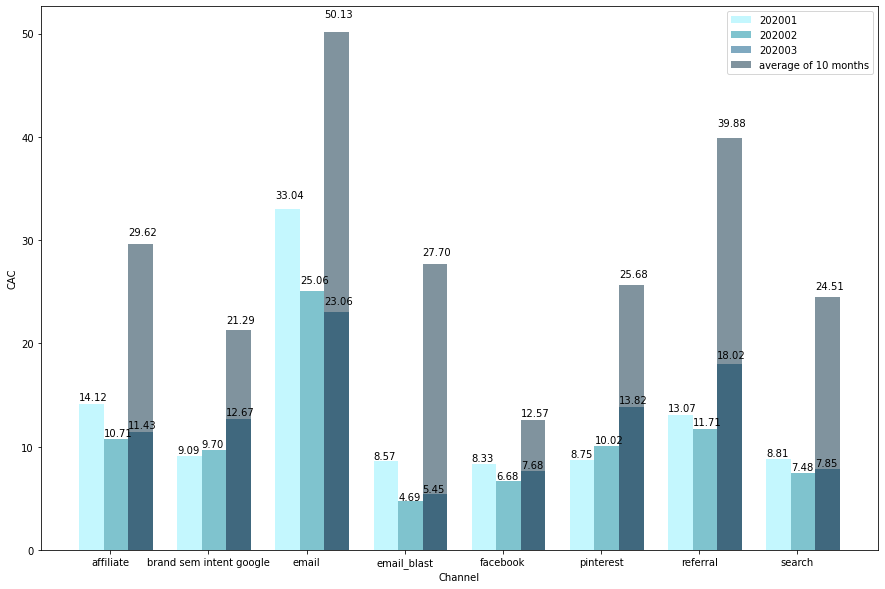

In [69]:
plt.figure(figsize=(15,10))

channel_l = list(df_tp['channel'])
#cac1=list(df_tp['cac1'])
#cac2=list(df_tp['cac2'])
#cac3=list(df_tp['cac3'])
#cac4=list(df_tp['cac4'])
#cac5=list(df_tp['cac5'])
#cac6=list(df_tp['cac6'])
#cac7=list(df_tp['cac7'])
cac8=list(df_tp['cac8'])
cac9=list(df_tp['cac9'])
cac10=list(df_tp['cac10'])
cac_mean = list(df_tp['cac_mean'])

bar_width=0.25

x =np.arange(8)

a=plt.bar(x,cac8,bar_width,color='#8af1fe',label='202001',alpha=0.5)
b=plt.bar(x+bar_width,cac9,bar_width,color='#01889f',label='202002',alpha=0.5)
c=plt.bar(x+bar_width+bar_width,cac10,bar_width,color='#015482',label='202003',alpha=0.5)
d=plt.bar(x+bar_width+bar_width,cac_mean,bar_width,color='#03293e',label='average of 10 months',alpha=0.5)


autolabel(a)
autolabel(b)
autolabel(c)
autolabel(d)

plt.xlabel("Channel")
plt.ylabel("CAC")

plt.xticks(x+bar_width/1.3,channel_l)

plt.legend()

plt.show()

## Churn

In [70]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from matplotlib import pyplot as plt
import numpy as np
import copy
import math

In [71]:
pd.options.display.max_columns = 25

In [72]:
def apply_offers(df, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn):
    df_f = copy.deepcopy(df)

    # set offer parameters for all observations
    df_f['price_no_offer'] = base_price
    df_f.loc[df_f['churn_TF'] == 1, 'price_no_offer'] = 0  # if the person churns they will pay 0

    # determine whether indiviudals accept offer
    df_f.loc[df_f['churn_TF'] == 1, 'accept_offer_prob'] = acceptance_rate_churn  # those who were going to churn are less likely to want the offer than those who were going to stay
    df_f.loc[df_f['churn_TF'] == 0, 'accept_offer_prob'] = acceptance_rate_nonchurn
    df_f['would_accept_offer_rand_draw'] = (df_f['random_draws'] < df_f['accept_offer_prob'])  # randomly select the individuals who would accept an offer based on their probability of acceptance

    # make offer under lpm predictions for select threshold
    df_f['make_offer_lpm'] = (df_f['prob_churn_lpm'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_lpm'] = (df_f['make_offer_lpm'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_lpm_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_lpm'], 'price_lpm_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    # make offer under logit predictions for select threshold
    df_f['make_offer_logit'] = (df_f['prob_churn_logit'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_logit'] = (df_f['make_offer_logit'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_logit_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_logit'], 'price_logit_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    df_impact = pd.DataFrame(index=cases, columns=['subs', 'revenue', 'lift_from_no_offer'])
    for c in cases:
        df_impact.loc[c, 'subs'] = (df_f['price_' + c] > 0).sum()
        df_impact.loc[c, 'revenue'] = df_f['price_' + c].sum()
    for c in cases:
        df_impact.loc[c, 'lift_from_no_offer'] = df_impact.loc[c, 'revenue'] / df_impact.loc['no_offer', 'revenue'] - 1

    return df_f, df_impact

In [73]:
def get_gini_info(actual, pred_prob):
    # format[[obs0_pred0, obs0_pred1], [obs1_pred0, obs1_pred1]]; rows (i) are observed, columns (j) are predicted
    confusion_matrix_list = list()
    for t in [x / 100 for x in range(0, 100, 33)]:
        pred = [1 if (x > t) else 0 for x in pred_prob]
        confusion_matrix_list.append(confusion_matrix(actual, pred))
        # confusion_matrix_list.append(model.pred_table(threshold=t))

    # create Gini coefficient plots
    false_positives = list()
    true_positives = list()
    for t in confusion_matrix_list:
        true_positives.append(t[1, 1])
        false_positives.append(t[0, 1])

    return confusion_matrix_list, false_positives, true_positives

In [74]:
# ----- READ IN DATA -----
df = pd.read_pickle('subscribers')
df
#df_train, df_test = model_selection.train_test_split(df, test_size=0.3, random_state=100)

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,...,discount_price,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,facebook,...,4.5141,2020-01-24 21:44:16,NaN,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,UAE,facebook,...,4.5141,2020-03-01 15:44:35,0.0,False,2020-03-16,False,0.0000,0.3303,ar,False,False,NaN
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,organic,...,4.5141,2019-12-07 16:37:06,1.0,False,2019-12-22,False,0.0000,0.1101,ar,False,False,NaN
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,UAE,search,...,4.5141,2020-01-27 16:09:32,0.0,False,2020-02-11,False,0.0000,0.0367,ar,False,False,NaN
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,UAE,discovery,...,4.5141,2019-10-05 12:57:07,9.0,False,2019-10-20,False,0.0000,0.0367,ar,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509326,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,38.0,False,UAE,facebook,...,4.5141,2019-11-17 14:12:33,8.0,False,2019-12-02,False,0.0000,0.3303,ar,False,False,NaN
229587,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,False,UAE,google_organic,...,4.5141,2019-12-06 18:02:13,NaN,True,2019-12-21,False,4.5875,0.3303,ar,True,False,Paypal
281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,False,45.0,False,UAE,facebook,...,4.5141,2019-12-21 19:40:44,31.0,True,2020-01-05,True,0.0000,0.0367,ar,False,False,NaN
87198,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,facebook,...,4.5141,2020-01-17 23:58:51,NaN,True,2020-02-01,False,NaN,NaN,ar,True,False,Paypal


In [75]:
df.columns

Index(['subid', 'package_type', 'num_weekly_services_utilized',
       'preferred_genre', 'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'retarget_TF', 'age', 'male_TF',
       'country', 'attribution_technical', 'attribution_survey', 'op_sys',
       'months_per_bill_period', 'plan_type', 'monthly_price',
       'discount_price', 'account_creation_date', 'creation_until_cancel_days',
       'cancel_before_trial_end', 'trial_end_date',
       'initial_credit_card_declined', 'revenue_net', 'join_fee', 'language',
       'paid_TF', 'refund_after_trial_TF', 'payment_type'],
      dtype='object')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227628 entries, 162502 to 598241
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   subid                         227628 non-null  int64         
 1   package_type                  192054 non-null  object        
 2   num_weekly_services_utilized  117178 non-null  float64       
 3   preferred_genre               191302 non-null  object        
 4   intended_use                  224079 non-null  object        
 5   weekly_consumption_hour       189698 non-null  float64       
 6   num_ideal_streaming_services  115458 non-null  float64       
 7   retarget_TF                   227628 non-null  bool          
 8   age                           192459 non-null  float64       
 9   male_TF                       227359 non-null  object        
 10  country                       227628 non-null  object        
 11  attribut

In [77]:
pd.options.display.max_columns = 30
df.creation_until_cancel_days.isna().sum()
# metric creation_until_cancel_days implies churn -> label y

75860

In [78]:
df = df.loc[:,["subid","package_type","monthly_price","preferred_genre","weekly_consumption_hour","age","male_TF","creation_until_cancel_days","num_ideal_streaming_services",
               "cancel_before_trial_end","refund_after_trial_TF","paid_TF"]]


In [79]:
df.describe()

,subid,monthly_price,weekly_consumption_hour,age,creation_until_cancel_days,num_ideal_streaming_services
count,2.276280e+05,227628.000000,189698.000000,1.924590e+05,151768.000000,115458.000000
mean,2.498624e+07,4.732049,27.997724,7.579755e+02,16.570832,1.999848
std,2.885543e+06,0.101049,4.976341,1.920204e+05,35.777986,0.249508
min,2.000001e+07,0.807400,-32.146760,0.000000e+00,-108.000000,-0.919933
25%,2.248998e+07,4.734300,24.401536,3.500000e+01,2.000000,1.867354
50%,2.497011e+07,4.734300,27.301448,4.600000e+01,8.000000,1.908159
75%,2.749020e+07,4.734300,30.201361,5.700000e+01,13.000000,1.953559
max,2.999998e+07,5.101300,76.599962,8.172000e+07,312.000000,6.955714


In [80]:
df["churn_TF"]=np.where(df["creation_until_cancel_days"].isna(),0,1)
df.drop(["creation_until_cancel_days"],axis = 1, inplace = True)
df

,subid,package_type,monthly_price,preferred_genre,weekly_consumption_hour,age,male_TF,num_ideal_streaming_services,cancel_before_trial_end,refund_after_trial_TF,paid_TF,churn_TF
162502,21724479,economy,4.7343,comedy,NaN,NaN,False,NaN,True,False,True,0
380374,23383224,base,4.7343,comedy,22.951579,70.0,False,NaN,False,False,False,1
496617,26844789,enhanced,4.7343,regional,36.001186,25.0,True,1.951776,False,False,False,1
356799,29417030,base,4.7343,drama,20.051667,30.0,False,NaN,False,False,False,1
681701,26723159,base,4.7343,comedy,22.951579,28.0,False,2.506384,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...
509326,21434712,enhanced,4.7343,comedy,28.751405,38.0,False,1.905485,False,False,False,1
229587,25843074,enhanced,4.7343,comedy,27.301448,49.0,False,1.835189,True,False,True,0
281340,24799085,base,4.7343,comedy,31.651317,45.0,False,NaN,True,False,False,1
87198,21308040,base,4.7343,comedy,NaN,NaN,False,NaN,True,False,True,0


In [81]:
df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93099 entries, 496617 to 229587
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   subid                         93099 non-null  int64  
 1   package_type                  93099 non-null  object 
 2   monthly_price                 93099 non-null  float64
 3   preferred_genre               93099 non-null  object 
 4   weekly_consumption_hour       93099 non-null  float64
 5   age                           93099 non-null  float64
 6   male_TF                       93099 non-null  object 
 7   num_ideal_streaming_services  93099 non-null  float64
 8   cancel_before_trial_end       93099 non-null  bool   
 9   refund_after_trial_TF         93099 non-null  bool   
 10  paid_TF                       93099 non-null  bool   
 11  churn_TF                      93099 non-null  int64  
dtypes: bool(3), float64(4), int64(2), object(3)
memory usa

In [82]:
df.dropna().describe()

,subid,monthly_price,weekly_consumption_hour,age,num_ideal_streaming_services,churn_TF
count,9.309900e+04,93099.000000,93099.000000,9.309900e+04,93099.000000,93099.000000
mean,2.499911e+07,4.734970,28.050541,8.939288e+01,1.998640,0.721952
std,2.880215e+06,0.016877,4.865208,7.199312e+03,0.248929,0.448040
min,2.000001e+07,4.000300,-32.146760,0.000000e+00,0.342855,0.000000
25%,2.249534e+07,4.734300,24.401536,3.500000e+01,1.866876,0.000000
50%,2.499433e+07,4.734300,27.301448,4.500000e+01,1.907006,1.000000
75%,2.749700e+07,4.734300,30.201361,5.600000e+01,1.952667,1.000000
max,2.999982e+07,5.101300,76.599962,1.952250e+06,6.955714,1.000000


no significant difference between orginal df and the one drop any na so I chose to use the one drop all NA instead of filling the NA with -999

In [83]:
df.fillna(-999, inplace = True)
df

,subid,package_type,monthly_price,preferred_genre,weekly_consumption_hour,age,male_TF,num_ideal_streaming_services,cancel_before_trial_end,refund_after_trial_TF,paid_TF,churn_TF
162502,21724479,economy,4.7343,comedy,-999.000000,-999.0,False,-999.000000,True,False,True,0
380374,23383224,base,4.7343,comedy,22.951579,70.0,False,-999.000000,False,False,False,1
496617,26844789,enhanced,4.7343,regional,36.001186,25.0,True,1.951776,False,False,False,1
356799,29417030,base,4.7343,drama,20.051667,30.0,False,-999.000000,False,False,False,1
681701,26723159,base,4.7343,comedy,22.951579,28.0,False,2.506384,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...
509326,21434712,enhanced,4.7343,comedy,28.751405,38.0,False,1.905485,False,False,False,1
229587,25843074,enhanced,4.7343,comedy,27.301448,49.0,False,1.835189,True,False,True,0
281340,24799085,base,4.7343,comedy,31.651317,45.0,False,-999.000000,True,False,False,1
87198,21308040,base,4.7343,comedy,-999.000000,-999.0,False,-999.000000,True,False,True,0


In [84]:
from sklearn import preprocessing

In [85]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# get numeric data
num_d = df.select_dtypes(exclude=['object'])

# update the cols with their normalized values
df[num_d.columns] = sc.fit_transform(num_d)

# convert string variable to One Hot Encoding
df = pd.get_dummies(df)

In [86]:
df

,subid,monthly_price,weekly_consumption_hour,age,num_ideal_streaming_services,cancel_before_trial_end,refund_after_trial_TF,paid_TF,churn_TF,package_type_-999,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_-999,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,male_TF_-999,male_TF_False,male_TF_True
162502,-1.130383,0.022272,-2.236193,-0.008413,-1.014550,1.094575,-0.205752,1.213620,-1.414437,0,0,1,0,0,1,0,0,0,0,0,1,0
380374,-0.555535,0.022272,0.433941,-0.002359,-1.014550,-0.913597,-0.205752,-0.823981,0.706995,0,1,0,0,0,1,0,0,0,0,0,1,0
496617,0.644091,0.022272,0.468037,-0.002614,0.985562,-0.913597,-0.205752,-0.823981,0.706995,0,0,0,1,0,0,0,0,0,1,0,0,1
356799,1.535517,0.022272,0.426364,-0.002586,-1.014550,-0.913597,-0.205752,-0.823981,0.706995,0,1,0,0,0,0,1,0,0,0,0,1,0
681701,0.601940,0.022272,0.433941,-0.002597,0.986670,-0.913597,-0.205752,-0.823981,0.706995,0,1,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509326,-1.230803,0.022272,0.449095,-0.002540,0.985470,-0.913597,-0.205752,-0.823981,0.706995,0,0,0,1,0,1,0,0,0,0,0,1,0
229587,0.296941,0.022272,0.445306,-0.002478,0.985329,1.094575,-0.205752,1.213620,-1.414437,0,0,0,1,0,1,0,0,0,0,0,1,0
281340,-0.064860,0.022272,0.456672,-0.002501,-1.014550,1.094575,-0.205752,-0.823981,0.706995,0,1,0,0,0,1,0,0,0,0,0,1,0
87198,-1.274702,0.022272,-2.236193,-0.008413,-1.014550,1.094575,-0.205752,1.213620,-1.414437,0,1,0,0,0,1,0,0,0,0,0,1,0


In [87]:
df["refund_after_trial_TF"]=np.where(df["refund_after_trial_TF"]<0,0,1)
df["paid_TF"]=np.where(df["paid_TF"]<0,0,1)
df["churn_TF"]=np.where(df["churn_TF"]<0,0,1)
df.head()

,subid,monthly_price,weekly_consumption_hour,age,num_ideal_streaming_services,cancel_before_trial_end,refund_after_trial_TF,paid_TF,churn_TF,package_type_-999,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_-999,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,male_TF_-999,male_TF_False,male_TF_True
162502,-1.130383,0.022272,-2.236193,-0.008413,-1.014550,1.094575,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0
380374,-0.555535,0.022272,0.433941,-0.002359,-1.014550,-0.913597,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0
496617,0.644091,0.022272,0.468037,-0.002614,0.985562,-0.913597,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1
356799,1.535517,0.022272,0.426364,-0.002586,-1.014550,-0.913597,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0
681701,0.601940,0.022272,0.433941,-0.002597,0.986670,-0.913597,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0


In [88]:
df.drop(["male_TF_False"],axis = 1, inplace = True)
df

,subid,monthly_price,weekly_consumption_hour,age,num_ideal_streaming_services,cancel_before_trial_end,refund_after_trial_TF,paid_TF,churn_TF,package_type_-999,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_-999,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,male_TF_-999,male_TF_True
162502,-1.130383,0.022272,-2.236193,-0.008413,-1.014550,1.094575,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
380374,-0.555535,0.022272,0.433941,-0.002359,-1.014550,-0.913597,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
496617,0.644091,0.022272,0.468037,-0.002614,0.985562,-0.913597,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1
356799,1.535517,0.022272,0.426364,-0.002586,-1.014550,-0.913597,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
681701,0.601940,0.022272,0.433941,-0.002597,0.986670,-0.913597,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509326,-1.230803,0.022272,0.449095,-0.002540,0.985470,-0.913597,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
229587,0.296941,0.022272,0.445306,-0.002478,0.985329,1.094575,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0
281340,-0.064860,0.022272,0.456672,-0.002501,-1.014550,1.094575,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
87198,-1.274702,0.022272,-2.236193,-0.008413,-1.014550,1.094575,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0


In [89]:
df.columns

Index(['subid', 'monthly_price', 'weekly_consumption_hour', 'age',
       'num_ideal_streaming_services', 'cancel_before_trial_end',
       'refund_after_trial_TF', 'paid_TF', 'churn_TF', 'package_type_-999',
       'package_type_base', 'package_type_economy', 'package_type_enhanced',
       'preferred_genre_-999', 'preferred_genre_comedy',
       'preferred_genre_drama', 'preferred_genre_international',
       'preferred_genre_other', 'preferred_genre_regional', 'male_TF_-999',
       'male_TF_True'],
      dtype='object')

In [90]:
df_train, df_test = model_selection.train_test_split(df, test_size=0.3, random_state=100)

In [91]:
y_col_name = 'churn_TF' # specify which column contains outcome variable y. Needs to be coded as binary True/False or 0/1
x_col_name = ['monthly_price', 'weekly_consumption_hour', 'age',
       'num_ideal_streaming_services', 'package_type_base',
       'package_type_economy', 'package_type_enhanced',
       'preferred_genre_comedy', 'preferred_genre_drama',
       'preferred_genre_international', 'preferred_genre_other',
       'preferred_genre_regional', 'male_TF_True']   # list of x covariates
add_constant_TF = True

In [92]:
# --- preprocess data for model routine format requirements
if add_constant_TF:
    x_col_name.append('const')
    df_train = sm.add_constant(df_train)
    df_test = sm.add_constant(df_test)

In [93]:
# --- fit linear probability model
lpm_model = sm.OLS(endog=df_train[y_col_name], exog=df_train[x_col_name])
lpm_results = lpm_model.fit()
print("\nRESULTS OF Linear MODEL FITTING\n")
print(lpm_results.summary())


RESULTS OF Linear MODEL FITTING

                            OLS Regression Results                            
Dep. Variable:               churn_TF   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     4754.
Date:                Mon, 13 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:27:45   Log-Likelihood:                -80140.
No. Observations:              159339   AIC:                         1.603e+05
Df Residuals:                  159325   BIC:                         1.604e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [94]:
# --- fit logistic regression
logit_model = sm.Logit(endog=df_train[y_col_name], exog=df_train[x_col_name])
logit_results = logit_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(logit_results.summary())

Optimization terminated successfully.
         Current function value: 0.492030
         Iterations 6

RESULTS OF LOGIT MODEL FITTING

                           Logit Regression Results                           
Dep. Variable:               churn_TF   No. Observations:               159339
Model:                          Logit   Df Residuals:                   159325
Method:                           MLE   Df Model:                           13
Date:                Mon, 13 Dec 2021   Pseudo R-squ.:                  0.2269
Time:                        22:27:45   Log-Likelihood:                -78399.
converged:                       True   LL-Null:                   -1.0141e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
monthly_price                    -0.0

In [95]:
# ----- EVALUATE MODEL PERFORMANCE -----
# --- evaluate model predictions on test set graphically
df_test['prob_churn_lpm'] = lpm_results.predict(df_test[x_col_name])
df_test['prob_churn_logit'] = logit_results.predict(df_test[x_col_name])

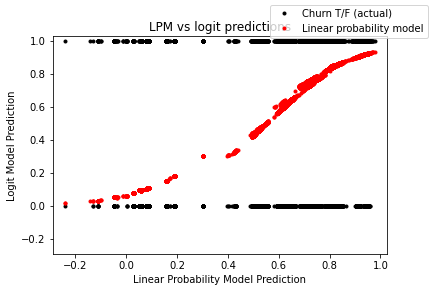

In [108]:
# compare lpm and logit predictions
fig = plt.figure()
ax = plt.gca()
ax.plot(df_test[['prob_churn_lpm']], df_test[['churn_TF']], 'k.')
ax.plot(df_test[['prob_churn_lpm']], df_test[['prob_churn_logit']], 'r.')
plt.ylim(df_test[['prob_churn_lpm', 'prob_churn_logit']].min().min()-.05, df_test[['prob_churn_lpm', 'prob_churn_logit']].max().max()+.05)
plt.xlim(ax.get_ylim())
plt.title('LPM vs logit predictions')
plt.xlabel('Linear Probability Model Prediction')
plt.ylabel('Logit Model Prediction')
fig.legend(labels=['Churn T/F (actual)', 'Linear probability model', 'Logit probability'])

In [109]:
# --- evaluate model predictions using numerical quantification (ROC curves)
# make confusion matrices
logit_conf_mat, logit_false_positives, logit_true_positives = get_gini_info(df_test['churn_TF'], df_test['prob_churn_logit'])
lpm_conf_mat, lpm_false_positives, lpm_true_positives = get_gini_info(df_test['churn_TF'], df_test['prob_churn_lpm'])

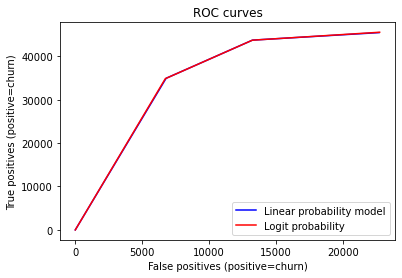

In [110]:
# plot ROC curves
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(lpm_false_positives, lpm_true_positives, 'b-')
ax1.plot(logit_false_positives, logit_true_positives, 'r-')
plt.title('ROC curves')
plt.xlabel('False positives (positive=churn)')
plt.ylabel('True positives (positive=churn)')
plt.legend(labels=['Linear probability model', 'Logit probability'])

### offer to what customers

In [111]:
# ----- TEST RETENTION OFFER SCENARIOS -----
# evaluate the impact of an offer
acceptance_rate_nonchurn = 1
acceptance_rate_churn = 0.3
threshold = 0.5
base_price = 4.7
discount_amount = 0.3
cases = ['no_offer', 'lpm_offer', 'logit_offer']

In [112]:
# draw whether individual would accept an offer or not - assume probability of acceptance is independent of offer attractiveness
np.random.seed(0)
df_test['random_draws'] = np.random.random(df_test.shape[0])

In [113]:
# base assessment
df_test, df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

In [114]:
df_impact

,subs,revenue,lift_from_no_offer
no_offer,22760,106972.0,0.0
lpm_offer,35905,131656.4,0.230756
logit_offer,35700,132015.48,0.234112


### probability of churn - best threshold

In [115]:
# test sensitivity to thresholds
df_lift_threshold = pd.DataFrame(index=range(0, 100, 1), columns=['threshold'] + cases)
for t_ind in df_lift_threshold.index:
    t_threshold = t_ind / 100
    _, t_df_impact = apply_offers(df_test, t_threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_threshold.loc[t_ind, 'threshold'] = t_threshold
    df_lift_threshold.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_threshold, t_ind

In [116]:
df_lift_threshold[(df_lift_threshold['logit_offer'] == max(df_lift_threshold['logit_offer']))]

,threshold,no_offer,lpm_offer,logit_offer
64,0.64,0.0,0.235031,0.23562


In [125]:
df_test_2, df_impact_2 = apply_offers(df_test, 0.64, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

In [126]:
df_impact_2

,subs,revenue,lift_from_no_offer
no_offer,22760,106972.0,0.0
lpm_offer,34925,132113.71,0.235031
logit_offer,33805,132176.69,0.23562


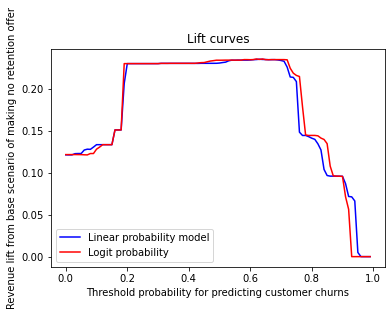

In [127]:
# --- plot lift curves
# Threshold sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['lpm_offer'], 'b-')
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Threshold probability for predicting customer churns')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

### best discount rate

In [128]:
# test sensitivity to offer discount amount
df_lift_discount_amount = pd.DataFrame(index=range(0, 100, 1), columns=['discount_amount'] + cases)
for t_ind in df_lift_discount_amount.index:
    t_discount_amount = t_ind / 100

    _, t_df_impact = apply_offers(df_test, 0.64, base_price, t_discount_amount, cases, t_discount_amount, acceptance_rate_nonchurn )

    df_lift_discount_amount.loc[t_ind, 'discount_amount'] = t_discount_amount
    df_lift_discount_amount.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_discount_amount, t_ind

In [121]:
df_lift_discount_amount[(df_lift_discount_amount['logit_offer'] == max(df_lift_discount_amount['logit_offer']))]

,discount_amount,no_offer,lpm_offer,logit_offer
37,0.37,0.0,0.24048,0.241087


In [129]:
df_test_3, df_impact_3 = apply_offers(df_test, 0.64, base_price, 0.37, cases, 0.37, acceptance_rate_nonchurn)

In [130]:
df_impact_3

,subs,revenue,lift_from_no_offer
no_offer,22760,106972.0,0.0
lpm_offer,37742,132980.296,0.243132
logit_offer,36371,133543.027,0.248392


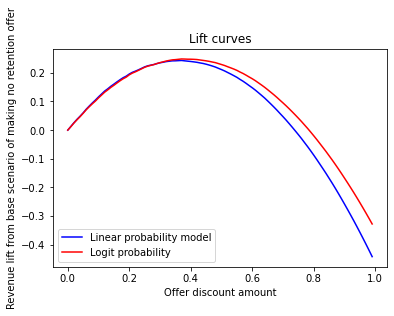

In [131]:
# Discount amount sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['lpm_offer'], 'b-')
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer discount amount')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])